# Lending Club Default(charged off, late also are included) Fully Paid Classification Model

+ **[Main Repository](https://github.com/shinys825/lc_project) for this project**/
+ **Raw data is gathered from Lending Club Loan Data and [Kaggle](https://www.kaggle.com/wendykan/lending-club-loan-data)**
+ **This project has been initiated from JAN 18 2017**
+ **Co-contributers are as below(sorted alphabetically)**
 + **Jang Sungguk(simfeel87@gmail.com)**
 + **Kim Gibeom(curtisk808@gmail.com)**
 + **Shin Yoonsig(shinys825@gmail.com)**

# Summary

## Basic Approach: How to build basic investment strategy for beginners
### : focus on 7-features not to lose money

#### Check List
- High annual income
- Low interest rate
- Low loan amount
- Opened employment title
- Issued on JAN, SEP, DEC
- Verification status and Owned house are not so important, but relatively positive

# Initialize

### Library loading

In [1]:
import re
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm

import matplotlib as mpl
import matplotlib.tri as mtri
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import seaborn as sns

import itertools

from scipy import stats
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

# Seaborn setting
sns.set(palette="hls", font_scale=2)

In [7]:
print np.mean(df["loan_amnt"])
print np.mean(df["int_rate"])
print np.median(df["int_rate"])

13675.4840827
13.8892585479
13.67


### Read dataframe

In [2]:
df = pd.read_csv('frames/lc_dataframe.csv')
print list(df.columns)
df.tail()

['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type']


,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type
268131,31050,21.99,857.40,6,61,1,10,2,875000.0,1,...,9.66,1,0,10,0,25770,79.3,13,0,1
268132,10800,7.89,337.89,1,15,1,8,2,92400.0,1,...,19.62,1,0,11,0,9760,68.7,36,1,1
268133,9000,9.17,286.92,2,22,1,1,2,80000.0,1,...,3.97,1,0,8,0,6320,51.8,17,0,1
268134,14400,25.99,431.06,6,65,0,11,6,62000.0,1,...,16.88,0,1,9,1,5677,45.1,30,0,1
268135,8000,12.59,267.98,3,32,1,4,5,45000.0,1,...,26.21,0,0,12,0,9097,50.8,47,1,1


### Check dataframe and elements

In [56]:
df.dtypes

loan_amnt                int64
int_rate               float64
installment            float64
grade                    int64
sub_grade                int64
emp_title                int64
emp_length               int64
home_ownership           int64
annual_inc             float64
verification_status      int64
issue_d                  int64
loan_status              int64
pymnt_plan               int64
desc                     int64
purpose                  int64
dti                    float64
delinq_2yrs              int64
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_bal                int64
revol_util             float64
total_acc                int64
initial_list_status      int64
application_type         int64
dtype: object

In [55]:
df.isnull().sum()

loan_amnt              0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
desc                   0
purpose                0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
initial_list_status    0
application_type       0
dtype: int64

# Data Preprocessing

### check correlation between dependent variables

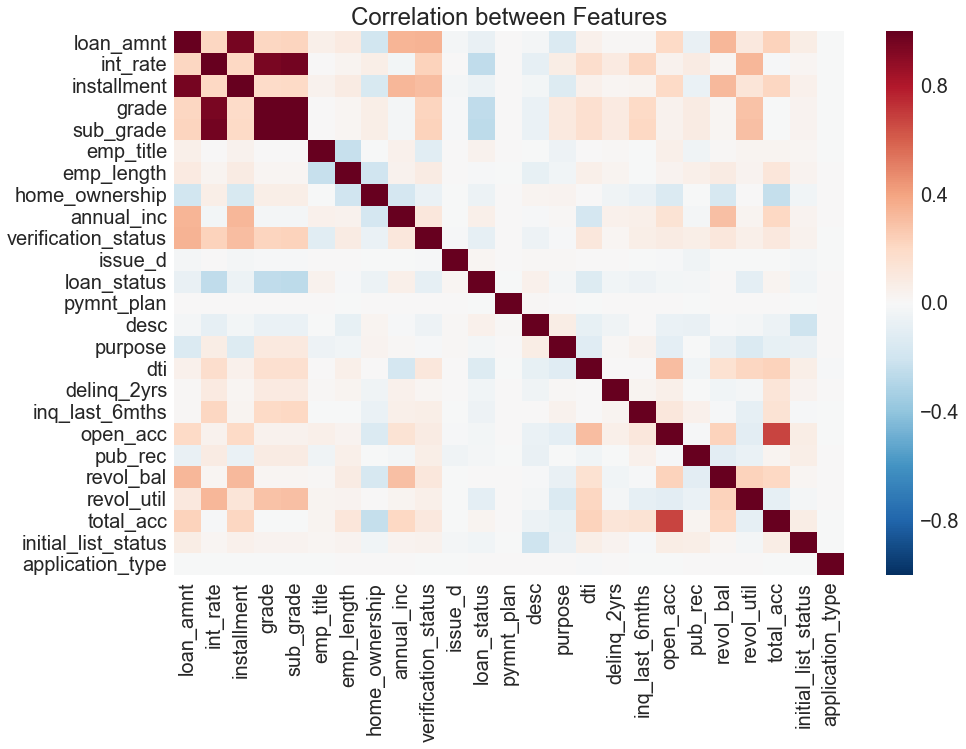

In [257]:
fig = plt.figure(figsize = (15, 10))
corrmat = df.corr()
sns.heatmap(corrmat)
plt.title("Correlation between Features")
plt.show()

### get high correlation

In [307]:
corr_stack = corrmat.abs().unstack()
ordered_stack = corr_stack.order(kind="quicksort", ascending=False)
order_ix = []

for num in range(len(ordered_stack)):
    if ordered_stack[num] > 0.6 and ordered_stack[num] < 1.0:
        order_ix.append(num)

print ordered_stack[min(order_ix):max(order_ix)]

sub_grade    grade          0.994620
grade        sub_grade      0.994620
sub_grade    int_rate       0.966306
int_rate     sub_grade      0.966306
installment  loan_amnt      0.954577
loan_amnt    installment    0.954577
int_rate     grade          0.950878
grade        int_rate       0.950878
open_acc     total_acc      0.672594
dtype: float64


D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


### remove high corrleation variables

In [3]:
del df["grade"]
del df["sub_grade"]
del df["installment"]
del df["open_acc"]

### check groupby elements

In [89]:
category_vars = ["emp_title", "emp_length", "home_ownership",
                 "verification_status", "issue_d", "purpose",
                 "initial_list_status", "pymnt_plan", "application_type"]

continuous_vars = ["loan_amnt", "int_rate", "annual_inc", 
                   "desc", "dti", "revol_bal", "revol_util", "total_acc",
                   "pub_rec", "inq_last_6mths", "delinq_2yrs"]

In [310]:
for var in category_vars:
    print df.groupby(var).loan_status.value_counts()

emp_title  loan_status
0          1               10494
           0                4471
1          1              197227
           0               55944
Name: loan_status, dtype: int64
emp_length  loan_status
0           1              17033
            0               5181
1           1              13892
            0               3984
2           1              19528
            0               5384
3           1              16846
            0               4761
4           1              13422
            0               3668
5           1              14856
            0               4122
6           1              12058
            0               3474
7           1              11483
            0               3381
8           1               9695
            0               2890
9           1               7789
            0               2392
10          1              63747
            0              17721
11          1               7372
            0               34

### remove variables 'pymnt_plan', 'application_type': almost every elements are in oneside

In [5]:
del df["pymnt_plan"]
del df["application_type"]

In [90]:
category_vars.remove("pymnt_plan")
category_vars.remove("application_type")

### rearrage 'home_ownership', 'purpose'

In [7]:
df["home_ownership"].replace([1, 3], 4, inplace=True)
df["home_ownership"].replace(2, 1, inplace=True)
df["home_ownership"].replace(4, 2, inplace=True)
df["home_ownership"].replace(5, 3, inplace=True)
df["home_ownership"].replace(6, 4, inplace=True)

In [327]:
np.unique(df["home_ownership"])

array([1, 2, 3, 4], dtype=int64)

| Home_ownership Category | Category number |
|-|-|
| Mortgage |	1 |
| Other | 2 |
| Own | 3 |
| Rent | 4 |

In [8]:
df["purpose"].replace([4, 11], 10, inplace=True)
df["purpose"].replace(13, 4, inplace=True)
df["purpose"].replace(14, 11, inplace=True)

In [326]:
np.unique(df["purpose"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

| Purpose Category | Category number |
|-|-|
| car |	1 |
| credit_card | 2 |
| debt_consolidation | 3 |
| vacation | 4 |
| home_improvement |5 |
| house |6 |
| major_purchase |7 |
| medical |8 |
| moving |9 |
| other |10 |
| wedding | 11 |
| small_business |12 |

### Histogram

In [332]:
print len(category_vars), len(continuous_vars)

7 11


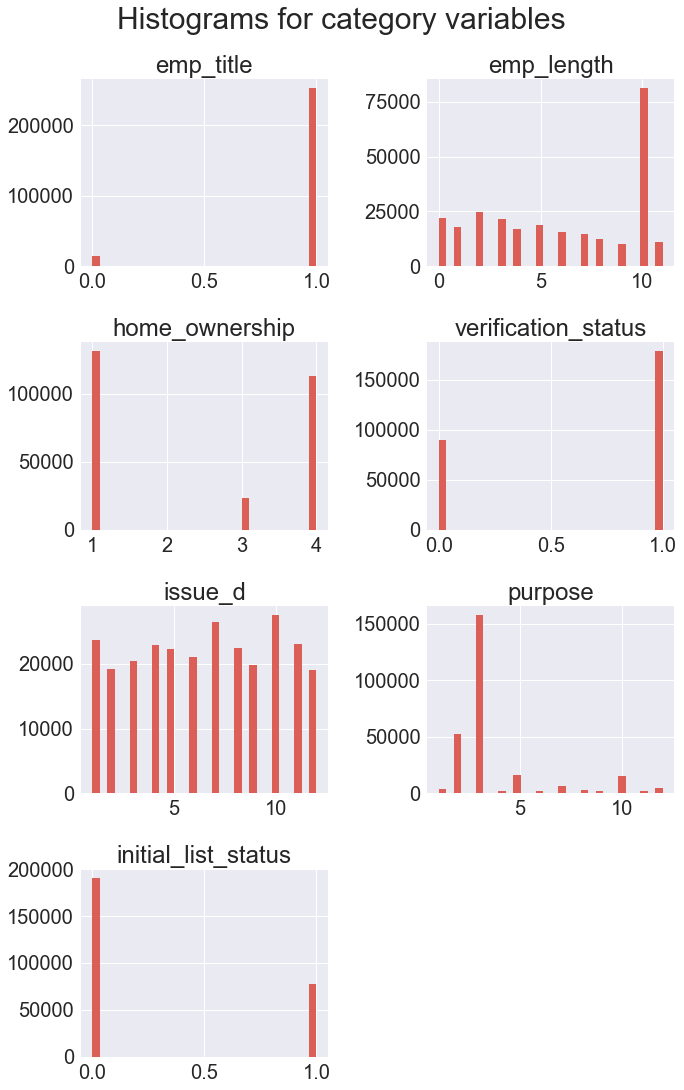

In [377]:
N=4; M=2;  # set row and column of the figure
fig = plt.figure(figsize=(10,15))  # figure size

plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0)  # subplot setting

# make subplot with face data index
for i in range(N):
    for j in range(M):
        if i * M + j < 7:
            ax = fig.add_subplot(N, M, i * M + j + 1)
            plt.hist(df[category_vars[i * M + j]], bins=30)
            plt.title(category_vars[i * M + j])
        else:
            pass
plt.tight_layout()
plt.suptitle("Histograms for category variables", y=1.02,fontsize=30)
plt.show()

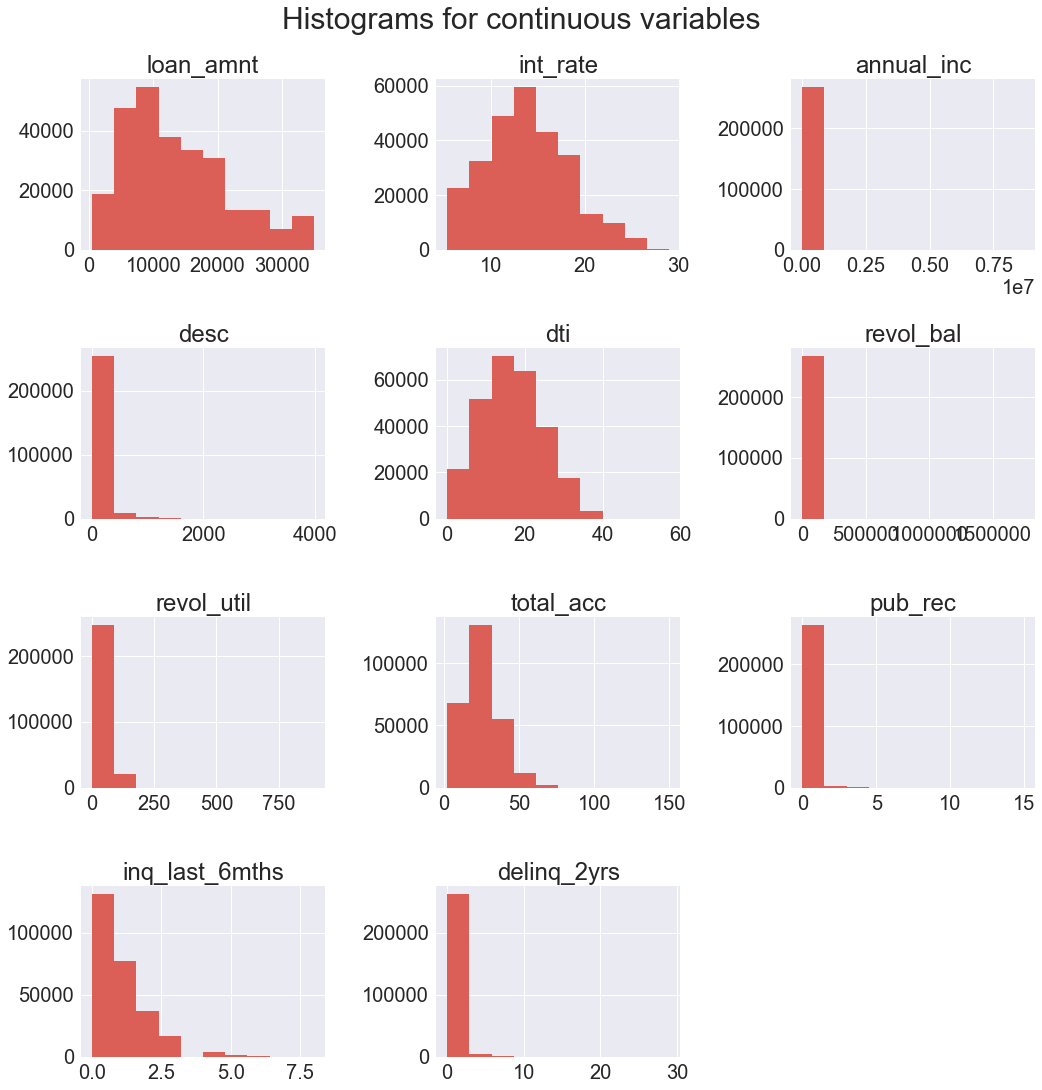

In [381]:
N=4; M=3;  # set row and column of the figure
fig = plt.figure(figsize=(15,15))  # figure size

plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0)  # subplot setting

# make subplot with face data index
for i in range(N):
    for j in range(M):
        if i * M + j < 11:
            ax = fig.add_subplot(N, M, i * M + j + 1)
            plt.hist(df[continuous_vars[i * M + j]], bins=10)
            plt.title(continuous_vars[i * M + j])
        else:
            pass
plt.tight_layout()
plt.suptitle("Histograms for continuous variables", y=1.02,fontsize=30)
plt.show()

### QQ-Plot

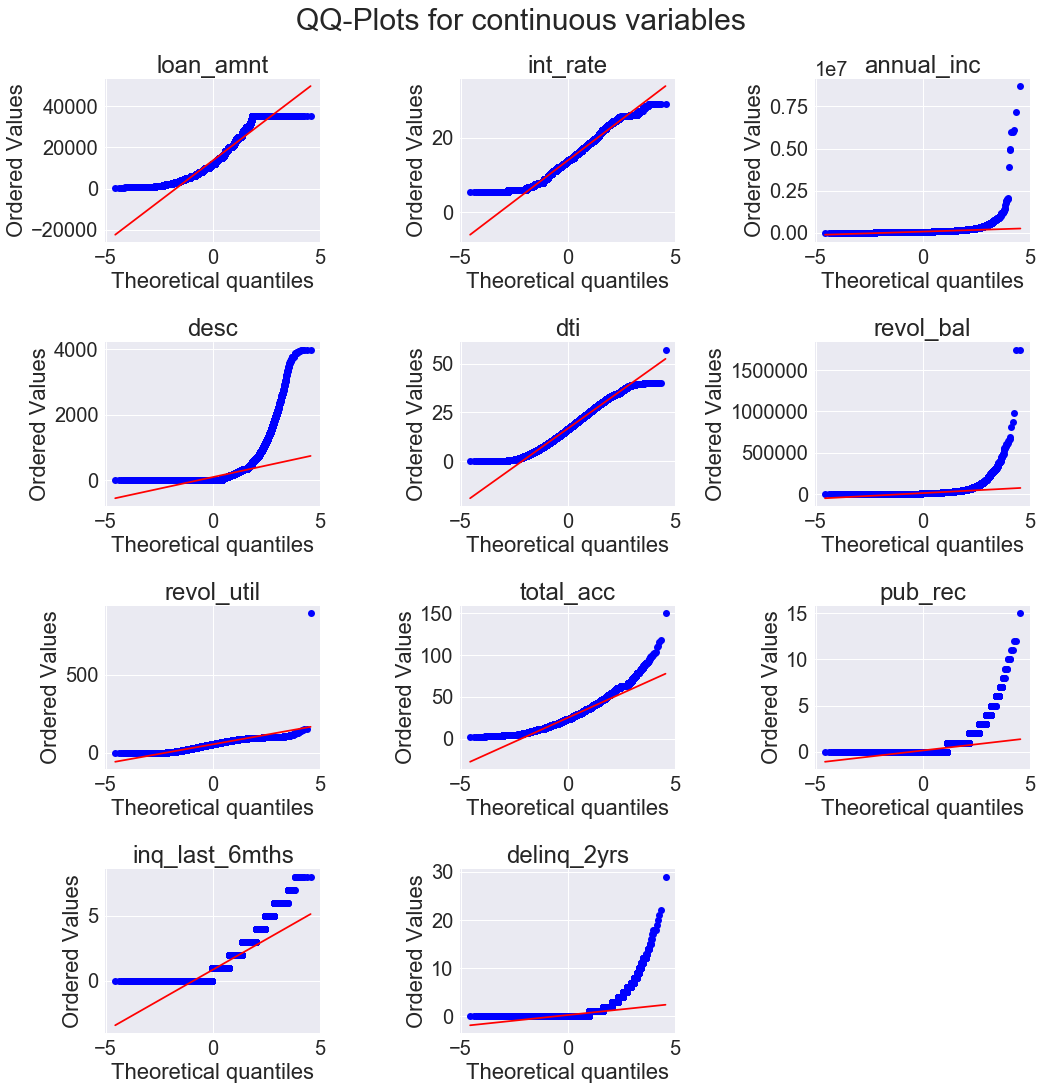

In [420]:
N=4; M=3;  # set row and column of the figure
fig = plt.figure(figsize=(15,15))  # figure size
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0)  # subplot setting

# make subplot with face data index
for i in range(N):
    for j in range(M):
        if i * M + j < 11:
            ax = fig.add_subplot(N, M, i * M + j + 1)
            sp.stats.probplot(df[continuous_vars[i * M + j]], plot=plt)
            plt.title(continuous_vars[i * M + j])
        else:
            pass
plt.tight_layout()
plt.suptitle("QQ-Plots for continuous variables", y=1.02,fontsize=30)
plt.show()

### Remove outliers(0.005% of highest and lowest observations)

In [9]:
outliers = int(len(df) * 0.00005)
print "Number of 0.005%: ", outliers

out_ix = np.array([])

for name in continuous_vars:
    out_large_list = np.array(df[name].nlargest(outliers).index)
    out_small_list = np.array(df[name].nsmallest(outliers).index)
    out_ix = np.concatenate((out_ix, out_large_list, out_small_list))
    out_ix = np.unique(out_ix)
print "Number of outliers(0.005% * 2): ", out_ix.shape[0]

Number of 0.005%:  13
Number of outliers(0.005% * 2):  248


In [10]:
cleaned_df = df.drop(df.index[list(out_ix)])
cleaned_df.index = range(len(cleaned_df))
cleaned_df.tail()

D:\Anaconda2\lib\site-packages\pandas\indexes\base.py:1434: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  result = getitem(key)


,loan_amnt,int_rate,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,initial_list_status
267883,31050,21.99,1,10,1,875000.0,1,12,1,0,3,9.66,1,0,0,25770,79.3,13,0
267884,10800,7.89,1,8,1,92400.0,1,12,1,0,2,19.62,1,0,0,9760,68.7,36,1
267885,9000,9.17,1,1,1,80000.0,1,12,1,0,3,3.97,1,0,0,6320,51.8,17,0
267886,14400,25.99,0,11,4,62000.0,1,12,1,0,3,16.88,0,1,1,5677,45.1,30,0
267887,8000,12.59,1,4,3,45000.0,1,12,1,0,3,26.21,0,0,0,9097,50.8,47,1


### QQ-Plot after removing outliers

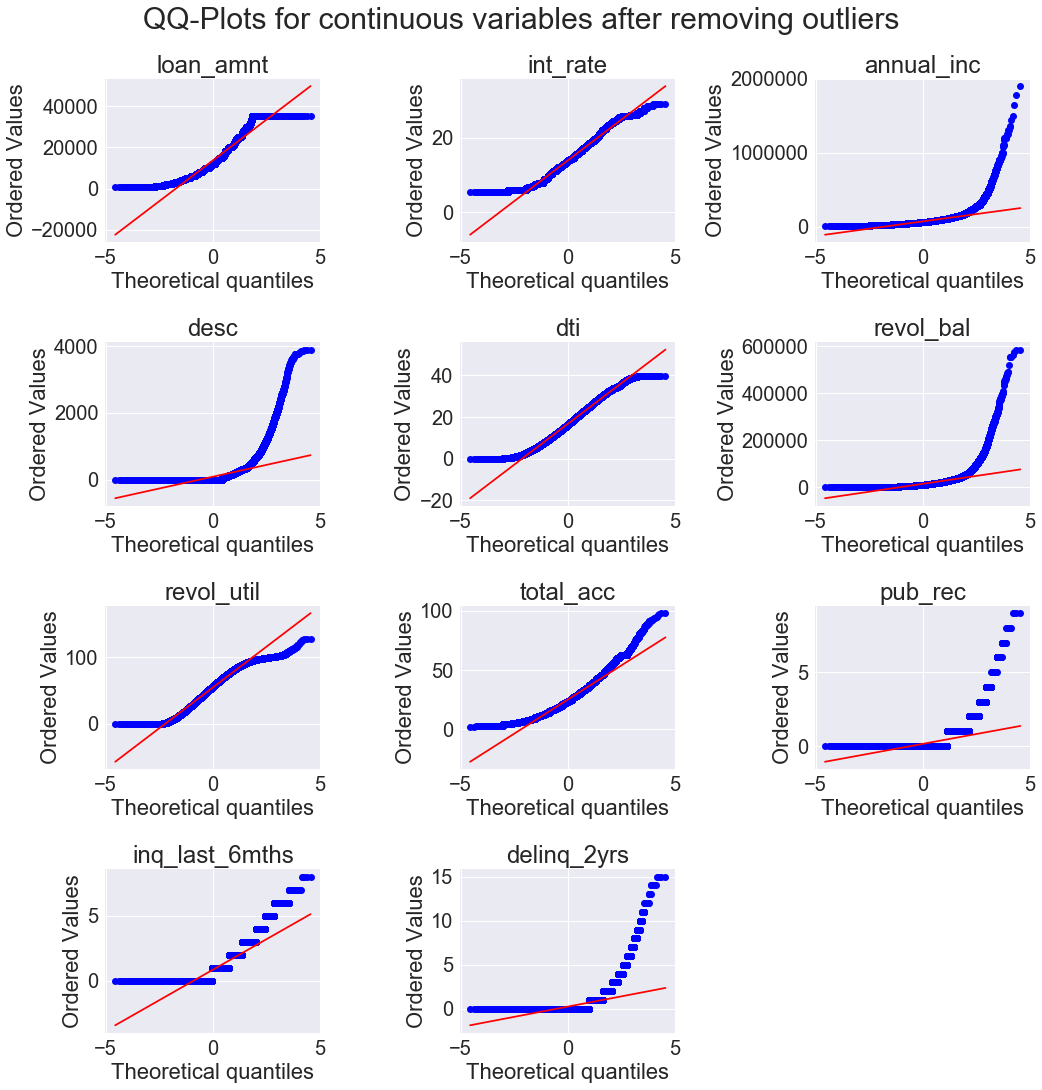

In [422]:
N=4; M=3;  # set row and column of the figure
fig = plt.figure(figsize=(15,15))  # figure size
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0)  # subplot setting

# make subplot with face data index
for i in range(N):
    for j in range(M):
        if i * M + j < 11:
            ax = fig.add_subplot(N, M, i * M + j + 1)
            sp.stats.probplot(cleaned_df[continuous_vars[i * M + j]], plot=plt)
            plt.title(continuous_vars[i * M + j])
        else:
            pass
plt.tight_layout()
plt.suptitle("QQ-Plots for continuous variables after removing outliers", y=1.02,fontsize=30)
plt.show()

### Scaling and Logarithm

In [11]:
log_vars = ["int_rate", "annual_inc", "loan_amnt"]
scaling_vars = ["desc", "dti", "revol_bal", "revol_util", "total_acc", "pub_rec", "inq_last_6mths", "delinq_2yrs"]

#### check 0 for log_vars to prevent '-inf'

In [401]:
for i in log_vars:
    print cleaned_df[cleaned_df[i].isin([int(0)])].index

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [12]:
cleaned_df[log_vars] = np.log10(cleaned_df[log_vars])

In [13]:
cleaned_df[scaling_vars] = preprocessing.scale(cleaned_df[scaling_vars])

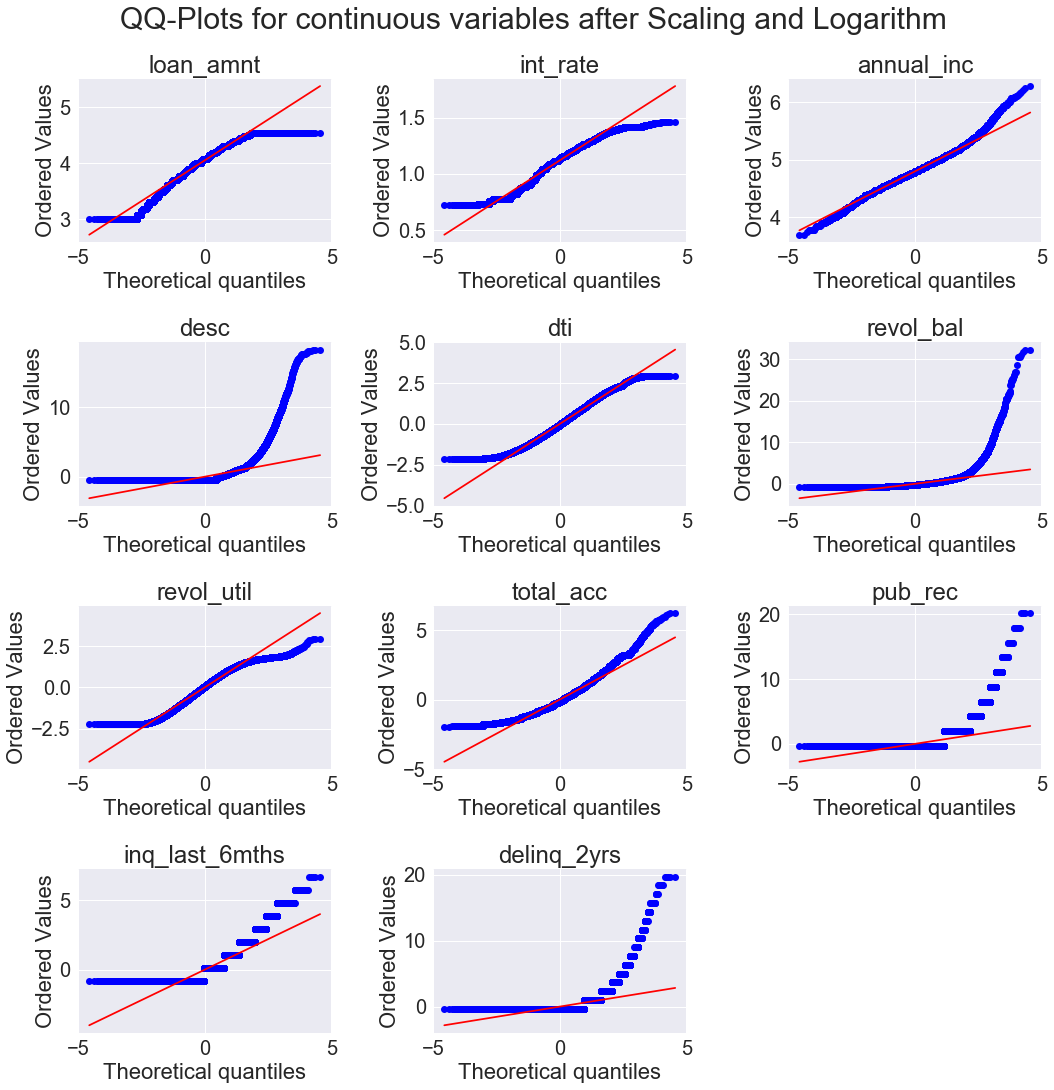

In [419]:
N=4; M=3;  # set row and column of the figure
fig = plt.figure(figsize=(15,15))  # figure size
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0)  # subplot setting

# make subplot with face data index
for i in range(N):
    for j in range(M):
        if i * M + j < 11:
            ax = fig.add_subplot(N, M, i * M + j + 1)
            sp.stats.probplot(cleaned_df[continuous_vars[i * M + j]], plot=plt)
            plt.title(continuous_vars[i * M + j])
        else:
            pass
plt.tight_layout()
plt.suptitle("QQ-Plots for continuous variables after Scaling and Logarithm", y=1.02,fontsize=30)
plt.show()

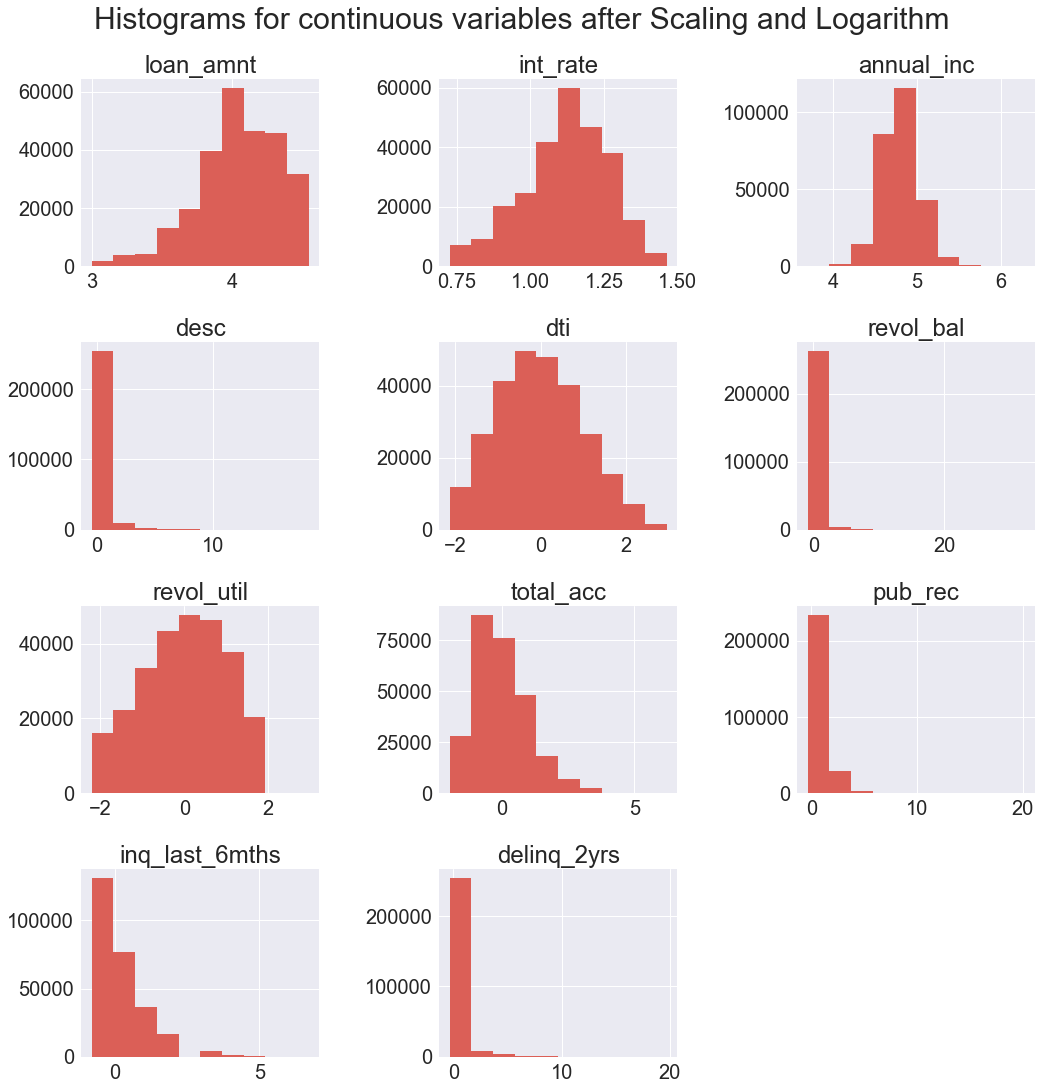

In [426]:
N=4; M=3;  # set row and column of the figure
fig = plt.figure(figsize=(15,15))  # figure size

plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0)  # subplot setting

# make subplot with face data index
for i in range(N):
    for j in range(M):
        if i * M + j < 11:
            ax = fig.add_subplot(N, M, i * M + j + 1)
            plt.hist(cleaned_df[continuous_vars[i * M + j]], bins=10)
            plt.title(continuous_vars[i * M + j])
        else:
            pass
plt.tight_layout()
plt.suptitle("Histograms for continuous variables after Scaling and Logarithm", y=1.02,fontsize=30)
plt.show()

# Fit and Scoring

### Under Sampling

In [14]:
scaled_df = cleaned_df

In [38]:
def under_sampling(df_name):
    
    global X, y, under_X, under_y, under_df
    
    X = df_name.ix[:, df_name.columns != "loan_status"]
    y = df_name.ix[:, df_name.columns == "loan_status"]

    default_ix = np.array(df_name[df_name.loan_status == 0].index)
    paid_ix = np.array(df_name[df_name.loan_status == 1].index)
    rand_paid_ix = np.random.choice(paid_ix, len(default_ix), replace=False)
    rand_ix = np.concatenate([default_ix, rand_paid_ix])

    print "X Shape: ", X.shape
    print "y Shape: ", y.shape
    print "Default Index Length: ", len(default_ix)
    print "Paid Index Length: ", len(rand_paid_ix)
    print "Random Index Shape: ", rand_ix.shape
    print "-" * 75

    under_df = df_name.iloc[rand_ix, :]
    under_X = under_df.ix[:, under_df.columns != "loan_status"]
    under_y = under_df.ix[:, under_df.columns == "loan_status"]

    print "Under DataFrame's X and y", len(under_X), len(under_y)
    print "Data Variables Names: under_df, under_X, under_y"

In [126]:
under_sampling(scaled_df)

X Shape:  (267888, 18)
y Shape:  (267888, 1)
Default Index Length:  60352
Paid Index Length:  60352
Random Index Shape:  (120704L,)
---------------------------------------------------------------------------
Under DataFrame's X and y 120704 120704
Data Variables Names: under_df, under_X, under_y


### Split train and test for under sampled data and whole data

In [183]:
under_train_X, under_test_X, under_train_y, under_test_y = train_test_split(
    under_X, under_y, test_size=0.20, random_state=0)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)

### Random Forest Fit

In [18]:
rf = RandomForestClassifier(max_features=None, random_state=0)
rf_result = rf.fit(under_train_X, under_train_y)

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


### Confusion Matrix

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Cofusion Matrix(predict with under sampled test set)

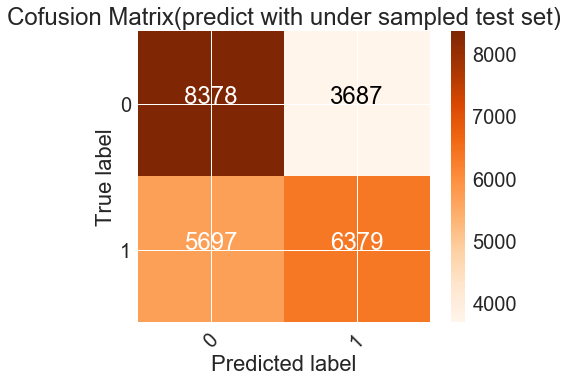

             precision    recall  f1-score   support

          0       0.60      0.69      0.64     12065
          1       0.63      0.53      0.58     12076

avg / total       0.61      0.61      0.61     24141



In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(under_test_y, rf_result.predict(under_test_X))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Cofusion Matrix(predict with under sampled test set)')
plt.show()

print classification_report(under_test_y, rf_result.predict(under_test_X))

### Cofusion Matrix(predict with whole test set)

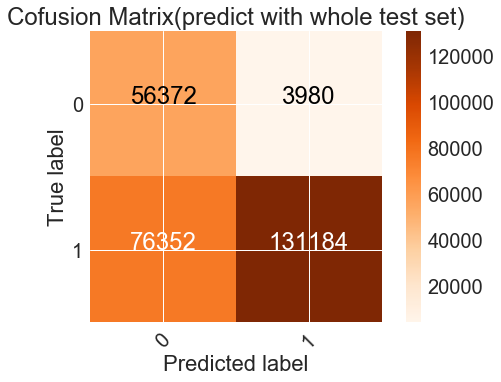

             precision    recall  f1-score   support

          0       0.42      0.93      0.58     60352
          1       0.97      0.63      0.77    207536

avg / total       0.85      0.70      0.72    267888



In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y, rf_result.predict(X))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Cofusion Matrix(predict with whole test set)')
plt.show()

print classification_report(y, rf_result.predict(X))

### Set CV and Models

In [71]:
cv = StratifiedKFold(n_splits=8, random_state=0, shuffle=False)

sgd = SGDClassifier(loss="log", fit_intercept=True,
                    average=1000, n_iter=30, n_jobs=8,
                    random_state=0)

lda = LinearDiscriminantAnalysis()

lr = LogisticRegression(n_jobs=8)

### Dummy Encoding for Categori Variables

In [113]:
dummies_df = scaled_df[continuous_vars]

for var in category_vars:
    dummies_df = dummies_df.join(pd.get_dummies(scaled_df[var], prefix=var))
print dummies_df.shape
print dummies_df.columns

dummies_df = dummies_df.join(scaled_df["loan_status"])
dummies_df.tail()

(267888, 57)
Index([u'loan_amnt', u'int_rate', u'annual_inc', u'desc', u'dti', u'revol_bal',
       u'revol_util', u'total_acc', u'pub_rec', u'inq_last_6mths',
       u'delinq_2yrs', u'emp_title_0', u'emp_title_1', u'emp_length_0',
       u'emp_length_1', u'emp_length_2', u'emp_length_3', u'emp_length_4',
       u'emp_length_5', u'emp_length_6', u'emp_length_7', u'emp_length_8',
       u'emp_length_9', u'emp_length_10', u'emp_length_11',
       u'home_ownership_1', u'home_ownership_2', u'home_ownership_3',
       u'home_ownership_4', u'verification_status_0', u'verification_status_1',
       u'issue_d_1', u'issue_d_2', u'issue_d_3', u'issue_d_4', u'issue_d_5',
       u'issue_d_6', u'issue_d_7', u'issue_d_8', u'issue_d_9', u'issue_d_10',
       u'issue_d_11', u'issue_d_12', u'purpose_1', u'purpose_2', u'purpose_3',
       u'purpose_4', u'purpose_5', u'purpose_6', u'purpose_7', u'purpose_8',
       u'purpose_9', u'purpose_10', u'purpose_11', u'purpose_12',
       u'initial_list_status_0'

,loan_amnt,int_rate,annual_inc,desc,dti,revol_bal,revol_util,total_acc,pub_rec,inq_last_6mths,...,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,initial_list_status_0,initial_list_status_1,loan_status
267883,4.492062,1.342225,5.942008,-0.419569,-0.899401,0.600672,1.004029,-1.025334,-0.335109,-0.798916,...,0,0,0,0,0,0,0,1,0,1
267884,4.033424,0.897077,4.965672,-0.419569,0.368136,-0.304613,0.574806,0.932358,-0.335109,-0.798916,...,0,0,0,0,0,0,0,0,1,1
267885,3.954243,0.962369,4.903090,-0.419569,-1.623526,-0.499128,-0.109522,-0.684866,-0.335109,-0.798916,...,0,0,0,0,0,0,0,1,0,1
267886,4.158362,1.414806,4.792392,-0.419569,0.019436,-0.535486,-0.380823,0.421656,1.941395,0.138736,...,0,0,0,0,0,0,0,1,0,1
267887,3.903090,1.100026,4.653213,-0.419569,1.206798,-0.342102,-0.150015,1.868646,-0.335109,-0.798916,...,0,0,0,0,0,0,0,0,1,1


In [109]:
under_sampling(dummies_df)

X Shape:  (267888, 57)
y Shape:  (267888, 1)
Default Index Length:  60352
Paid Index Length:  60352
Random Index Shape:  (120704L,)
---------------------------------------------------------------------------
Under DataFrame's X and y 120704 120704
Data Variables Names: under_df, under_X, under_y


### Get Scores

#### SGD

In [124]:
print "SGD CV Accuracy for under sampled dataset"
sgd_cv_under = cross_val_score(sgd, under_X,
            np.array(under_y).reshape(len(under_y, )),
            cv = cv, scoring="accuracy", n_jobs=8)
print "Each Validation's Accuracy: ", sgd_cv_under
print "Average Accuracy: ", np.mean(sgd_cv_under)

print '-' * 75

print "SGD CV Accuracy for whole dataset"
sgd_cv_whole = cross_val_score(sgd, X,
            np.array(y).reshape(len(y, )),
            cv = cv, scoring="accuracy", n_jobs=8)
print "Each Validation's Accuracy: ", sgd_cv_whole
print "Average Accuracy: ", np.mean(sgd_cv_whole)

SGD CV Accuracy for under sampled dataset
Each Validation's Accuracy:  [ 0.45  0.59  0.64  0.59  0.6   0.59  0.58  0.65]
Average Accuracy:  0.585722097031
---------------------------------------------------------------------------
SGD CV Accuracy for whole dataset
Each Validation's Accuracy:  [ 0.78  0.77  0.75  0.72  0.73  0.73  0.75  0.77]
Average Accuracy:  0.750216508392


#### LDA

In [80]:
print "LDA CV Accuracy for under sampled dataset"
lda_cv_under = cross_val_score(lda, under_X,
            np.array(under_y).reshape(len(under_y, )),
            cv = cv, scoring="accuracy", n_jobs=8)
print "Each Validation's Accuracy: ", lda_cv_under
print "Average Accuracy: ", np.mean(lda_cv_under)

print '-' * 75

print "LDA CV Accuracy for whole dataset"
lda_cv_whole = cross_val_score(lda, X,
            np.array(y).reshape(len(y, )),
            cv = cv, scoring="accuracy", n_jobs=8)
print "Each Validation's Accuracy: ", lda_cv_whole
print "Average Accuracy: ", np.mean(lda_cv_whole)

LDA CV Accuracy for under sampled dataset
Each Validation's Accuracy:  [ 0.46  0.6   0.64  0.6   0.6   0.58  0.57  0.64]
Average Accuracy:  0.588108099152
---------------------------------------------------------------------------
LDA CV Accuracy for whole dataset
Each Validation's Accuracy:  [ 0.78  0.77  0.75  0.72  0.73  0.73  0.74  0.77]
Average Accuracy:  0.749914143224


#### LogisticRegression

In [125]:
print "LogisticRegression CV Accuracy for under sampled dataset"
lr_cv_under = cross_val_score(lr, under_X,
            np.array(under_y).reshape(len(under_y, )),
            cv = cv, scoring="accuracy", n_jobs=8)
print "Each Validation's Accuracy: ", lr_cv_under
print "Average Accuracy: ", np.mean(lr_cv_under)

print '-' * 75

print "LogisticRegression CV Accuracy for whole dataset"
lr_cv_whole = cross_val_score(lr, X,
            np.array(y).reshape(len(y, )),
            cv = cv, scoring="accuracy", n_jobs=8)
print "Each Validation's Accuracy: ", lr_cv_whole
print "Average Accuracy: ", np.mean(lr_cv_whole)

LogisticRegression CV Accuracy for under sampled dataset
Each Validation's Accuracy:  [ 0.45  0.59  0.64  0.59  0.6   0.59  0.58  0.65]
Average Accuracy:  0.586915098091
---------------------------------------------------------------------------
LogisticRegression CV Accuracy for whole dataset
Each Validation's Accuracy:  [ 0.78  0.77  0.75  0.72  0.73  0.73  0.75  0.77]
Average Accuracy:  0.748308994804


### Random Forest Feature importances

1. loan_amnt / feature_n: 1 / importance: 0.158881575828
2. int_rate / feature_n: 10 / importance: 0.114321064941
3. emp_title / feature_n: 14 / importance: 0.104817431158
4. emp_length / feature_n: 15 / importance: 0.103399981851
5. home_ownership / feature_n: 5 / importance: 0.0919407006712
6. annual_inc / feature_n: 0 / importance: 0.0849728830988
7. verification_status / feature_n: 16 / importance: 0.0784396621926
8. issue_d / feature_n: 7 / importance: 0.0540577119001
9. desc / feature_n: 3 / importance: 0.045905758798
10. purpose / feature_n: 8 / importance: 0.0405277987998
11. dti / feature_n: 9 / importance: 0.0290124276806
12. delinq_2yrs / feature_n: 12 / importance: 0.0268262275236
13. inq_last_6mths / feature_n: 4 / importance: 0.0158916830919
14. pub_rec / feature_n: 11 / importance: 0.0152995025604
15. revol_bal / feature_n: 13 / importance: 0.0111792915635
16. revol_util / feature_n: 17 / importance: 0.0105867564604
17. total_acc / feature_n: 6 / importance: 0.0093510173

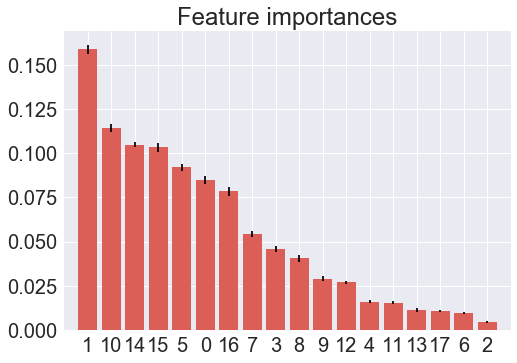

In [469]:
importances = rf_result.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("{}. {} / feature_n: {} / importance: {}".format(f+1, list(X.columns)[f], indices[f], importances[indices[f]]))

std = np.std([tree.feature_importances_ for tree in rf_result.estimators_],
             axis=0)

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Optimization

## Fit iteration 1

### Logistic Regressions with High feature importance variables to check p-value and coefficient

In [167]:
model = sm.Logit.from_formula("loan_status ~ loan_amnt + int_rate + C(emp_title) + C(emp_length) + annual_inc + C(verification_status) + C(home_ownership)",
                              data=under_df)
result = model.fit()
print result.pred_table()
result.summary()

Optimization terminated successfully.
         Current function value: 0.632952
         Iterations 5
[[ 40636.  19716.]
 [ 23609.  36743.]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:               120704
Model:                          Logit   Df Residuals:                   120684
Method:                           MLE   Df Model:                           19
Date:                Fri, 17 Mar 2017   Pseudo R-squ.:                 0.08684
Time:                        05:03:46   Log-Likelihood:                -76400.
converged:                       True   LL-Null:                       -83666.
                                        LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                       1.6425      0.163     10.096      0.000         1.324     1.961
C(emp_title)[T.1]               0.3131      0.048      6.558      0.000         0.220     0.407
C(emp_length)[T.1]              0.0384      0.032      1.208      0.227        -0.024     0.101
C(emp_length)[T.2]              0.0979      0.029      3.356      0.001         0.041     0.155
C(emp_length)[T.3]              0.0682      0.030      2.262      0.024         0.009     0.127
C(emp_length)[T.4]              0.0814      0.032      2.520      0.012         0.018     0.145
C(emp_length)[T.5]              0.0865      0.031      2.762      0.006         0.025     0.148
C(emp_length)[T.6]              0.0403      0.033      1.216      0.224        -0.025     0.105
C(emp_length)[T.7]              0.0092      0.034      0.275      0.784        -0.057     0.075
C(emp_length)[T.8]              0.0038      0.035      0.108      0.914        -0.065     0.073
C(emp_length)[T.9]             -0.0040      0.038     -0.107      0.915        -0.078     0.070
C(emp_length)[T.10]             0.0551      0.024      2.272      0.023         0.008     0.103
C(emp_length)[T.11]            -0.0343      0.059     -0.583      0.560        -0.150     0.081
C(verification_status)[T.1]    -0.1118      0.014     -7.730      0.000        -0.140    -0.083
C(home_ownership)[T.2]          0.0834      0.239      0.349      0.727        -0.385     0.552
C(home_ownership)[T.3]         -0.0574      0.023     -2.545      0.011        -0.102    -0.013
C(home_ownership)[T.4]         -0.1470      0.014    -10.824      0.000        -0.174    -0.120
loan_amnt                      -0.7416      0.026    -29.060      0.000        -0.792    -0.692
int_rate                       -4.3722      0.049    -89.828      0.000        -4.468    -4.277
annual_inc                      1.2937      0.033     39.068      0.000         1.229     1.359
===============================================================================================
"""

### Remove the variable with high p-value

In [184]:
iter_df = scaled_df.drop("emp_length", 1)
under_sampling(iter_df)

X Shape:  (267888, 17)
y Shape:  (267888, 1)
Default Index Length:  60352
Paid Index Length:  60352
Random Index Shape:  (120704L,)
---------------------------------------------------------------------------
Under DataFrame's X and y 120704 120704
Data Variables Names: under_df, under_X, under_y


In [185]:
under_train_X, under_test_X, under_train_y, under_test_y = train_test_split(
    under_X, under_y, test_size=0.20, random_state=0)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)

In [159]:
def rf_fit():
    rf = RandomForestClassifier(max_features=None, random_state=0)
    rf_result = rf.fit(under_train_X, under_train_y)

    importances = rf_result.feature_importances_
    indices = np.argsort(importances)[::-1]

    for f in range(X.shape[1]):
        print("{}. {} / feature_n: {} / importance: {}".format(f+1, list(X.columns)[f], indices[f], importances[indices[f]]))

    std = np.std([tree.feature_importances_ for tree in rf_result.estimators_],
                 axis=0)

    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


1. loan_amnt / feature_n: 1 / importance: 0.163012653529
2. int_rate / feature_n: 9 / importance: 0.122158240701
3. emp_title / feature_n: 13 / importance: 0.110458846173
4. home_ownership / feature_n: 14 / importance: 0.107975373878
5. annual_inc / feature_n: 4 / importance: 0.0956290069998
6. verification_status / feature_n: 0 / importance: 0.088868919899
7. issue_d / feature_n: 15 / importance: 0.081914717001
8. desc / feature_n: 6 / importance: 0.0563041257624
9. purpose / feature_n: 7 / importance: 0.0422866619251
10. dti / feature_n: 8 / importance: 0.0305744085439
11. delinq_2yrs / feature_n: 11 / importance: 0.0280201247177
12. inq_last_6mths / feature_n: 3 / importance: 0.01652521287
13. pub_rec / feature_n: 10 / importance: 0.0164114731871
14. revol_bal / feature_n: 12 / importance: 0.0121277878523
15. revol_util / feature_n: 16 / importance: 0.0108470909168
16. total_acc / feature_n: 5 / importance: 0.0102946919374
17. initial_list_status / feature_n: 2 / importance: 0.00659

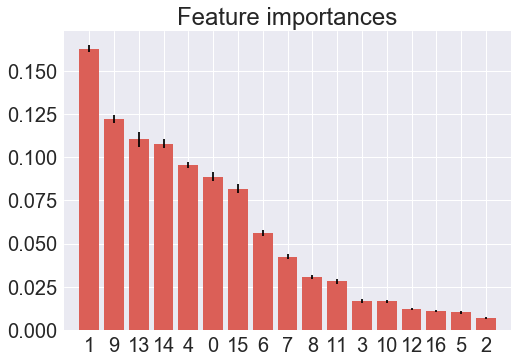

In [187]:
rf_fit()

## Fit Iteration 2

In [164]:
model = sm.Logit.from_formula("loan_status ~ loan_amnt + int_rate + C(emp_title) + C(issue_d) + annual_inc + C(verification_status) + C(home_ownership)",
                              data=under_df)
result = model.fit()
print result.pred_table()
result.summary()

Optimization terminated successfully.
         Current function value: 0.632352
         Iterations 5
[[ 40723.  19629.]
 [ 23608.  36744.]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:               120704
Model:                          Logit   Df Residuals:                   120684
Method:                           MLE   Df Model:                           19
Date:                Fri, 17 Mar 2017   Pseudo R-squ.:                 0.08771
Time:                        05:03:01   Log-Likelihood:                -76327.
converged:                       True   LL-Null:                       -83666.
                                        LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                       1.5862      0.153     10.382      0.000         1.287     1.886
C(emp_title)[T.1]               0.3586      0.026     13.610      0.000         0.307     0.410
C(issue_d)[T.2]                -0.0279      0.031     -0.915      0.360        -0.088     0.032
C(issue_d)[T.3]                -0.0120      0.030     -0.396      0.692        -0.071     0.047
C(issue_d)[T.4]                -0.0634      0.029     -2.160      0.031        -0.121    -0.006
C(issue_d)[T.5]                -0.0360      0.029     -1.228      0.219        -0.093     0.021
C(issue_d)[T.6]                -0.0192      0.030     -0.646      0.518        -0.078     0.039
C(issue_d)[T.7]                -0.0666      0.028     -2.361      0.018        -0.122    -0.011
C(issue_d)[T.8]                 0.0531      0.030      1.786      0.074        -0.005     0.111
C(issue_d)[T.9]                 0.1493      0.031      4.873      0.000         0.089     0.209
C(issue_d)[T.10]                0.0121      0.028      0.430      0.667        -0.043     0.067
C(issue_d)[T.11]                0.0378      0.029      1.281      0.200        -0.020     0.096
C(issue_d)[T.12]                0.1565      0.031      4.987      0.000         0.095     0.218
C(verification_status)[T.1]    -0.1424      0.014     -9.884      0.000        -0.171    -0.114
C(home_ownership)[T.2]          0.2426      0.233      1.039      0.299        -0.215     0.700
C(home_ownership)[T.3]         -0.0758      0.023     -3.357      0.001        -0.120    -0.032
C(home_ownership)[T.4]         -0.1550      0.013    -11.566      0.000        -0.181    -0.129
loan_amnt                      -0.7573      0.026    -29.665      0.000        -0.807    -0.707
int_rate                       -4.3215      0.049    -88.754      0.000        -4.417    -4.226
annual_inc                      1.3106      0.033     40.022      0.000         1.246     1.375
===============================================================================================
"""

In [188]:
iter_df["issue_d"] = iter_df["issue_d"].replace([1, 9, 12], 1)
iter_df["issue_d"] = iter_df["issue_d"].replace([2, 3, 4, 5, 6, 7, 8, 10, 11], 0)

print np.unique(iter_df["issue_d"])
under_sampling(iter_df)

[0 1]
X Shape:  (267888, 17)
y Shape:  (267888, 1)
Default Index Length:  60352
Paid Index Length:  60352
Random Index Shape:  (120704L,)
---------------------------------------------------------------------------
Under DataFrame's X and y 120704 120704
Data Variables Names: under_df, under_X, under_y


In [189]:
under_train_X, under_test_X, under_train_y, under_test_y = train_test_split(
    under_X, under_y, test_size=0.20, random_state=0)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


1. loan_amnt / feature_n: 1 / importance: 0.168268150536
2. int_rate / feature_n: 9 / importance: 0.128251442655
3. emp_title / feature_n: 13 / importance: 0.115353508891
4. home_ownership / feature_n: 14 / importance: 0.113473816335
5. annual_inc / feature_n: 4 / importance: 0.101729866349
6. verification_status / feature_n: 0 / importance: 0.0923634635808
7. issue_d / feature_n: 15 / importance: 0.087299923558
8. desc / feature_n: 7 / importance: 0.0429419049315
9. purpose / feature_n: 8 / importance: 0.0326709198208
10. dti / feature_n: 11 / importance: 0.0294871400802
11. delinq_2yrs / feature_n: 10 / importance: 0.017892607527
12. inq_last_6mths / feature_n: 3 / importance: 0.0166550554523
13. pub_rec / feature_n: 16 / importance: 0.0122725152856
14. revol_bal / feature_n: 12 / importance: 0.0119994681601
15. revol_util / feature_n: 6 / importance: 0.0114018819998
16. total_acc / feature_n: 5 / importance: 0.0107822332615
17. initial_list_status / feature_n: 2 / importance: 0.0071

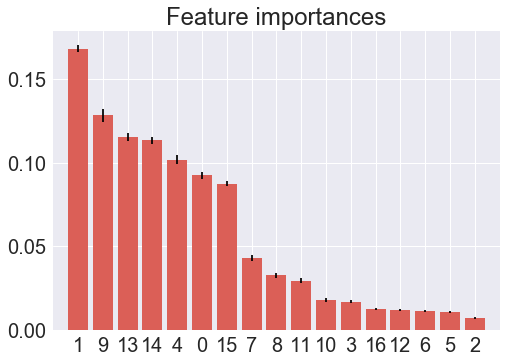

In [190]:
rf_fit()

### Fit iteration 3

In [176]:
model = sm.Logit.from_formula("loan_status ~ loan_amnt + int_rate + C(emp_title) + C(issue_d) + annual_inc + C(verification_status) + C(home_ownership)",
                              data=under_df)
result = model.fit()
print result.pred_table()
result.summary()

Optimization terminated successfully.
         Current function value: 0.632503
         Iterations 5
[[ 40681.  19671.]
 [ 23502.  36850.]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:               120704
Model:                          Logit   Df Residuals:                   120694
Method:                           MLE   Df Model:                            9
Date:                Fri, 17 Mar 2017   Pseudo R-squ.:                 0.08749
Time:                        05:07:29   Log-Likelihood:                -76346.
converged:                       True   LL-Null:                       -83666.
                                        LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                       1.8122      0.151     11.972      0.000         1.516     2.109
C(emp_title)[T.1]               0.3341      0.026     12.754      0.000         0.283     0.385
C(issue_d)[T.1]                 0.1226      0.015      8.423      0.000         0.094     0.151
C(verification_status)[T.1]    -0.1376      0.014     -9.554      0.000        -0.166    -0.109
C(home_ownership)[T.2]          0.0941      0.241      0.391      0.696        -0.378     0.566
C(home_ownership)[T.3]         -0.0729      0.023     -3.226      0.001        -0.117    -0.029
C(home_ownership)[T.4]         -0.1462      0.013    -10.918      0.000        -0.172    -0.120
loan_amnt                      -0.7678      0.026    -30.063      0.000        -0.818    -0.718
int_rate                       -4.3578      0.049    -89.725      0.000        -4.453    -4.263
annual_inc                      1.2804      0.033     38.992      0.000         1.216     1.345
===============================================================================================
"""

In [191]:
fitted_cols = ["loan_status", "emp_title", "issue_d", "verification_status",
               "home_ownership", "loan_amnt", "int_rate", "annual_inc"]
fitted_df = iter_df.reindex(columns=fitted_cols)
fitted_df.tail()

,loan_status,emp_title,issue_d,verification_status,home_ownership,loan_amnt,int_rate,annual_inc
267883,1,1,1,1,1,4.492062,1.342225,5.942008
267884,1,1,1,1,1,4.033424,0.897077,4.965672
267885,1,1,1,1,1,3.954243,0.962369,4.903090
267886,1,0,1,1,4,4.158362,1.414806,4.792392
267887,1,1,1,1,3,3.903090,1.100026,4.653213


In [192]:
under_sampling(fitted_df)

X Shape:  (267888, 7)
y Shape:  (267888, 1)
Default Index Length:  60352
Paid Index Length:  60352
Random Index Shape:  (120704L,)
---------------------------------------------------------------------------
Under DataFrame's X and y 120704 120704
Data Variables Names: under_df, under_X, under_y


In [196]:
under_train_X, under_test_X, under_train_y, under_test_y = train_test_split(
    under_X, under_y, test_size=0.20, random_state=0)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


1. emp_title / feature_n: 5 / importance: 0.302556766856
2. issue_d / feature_n: 6 / importance: 0.291654176929
3. verification_status / feature_n: 4 / importance: 0.270477162656
4. home_ownership / feature_n: 3 / importance: 0.054684974733
5. loan_amnt / feature_n: 1 / importance: 0.0357518921347
6. int_rate / feature_n: 2 / importance: 0.0320879910333
7. annual_inc / feature_n: 0 / importance: 0.0127870356587


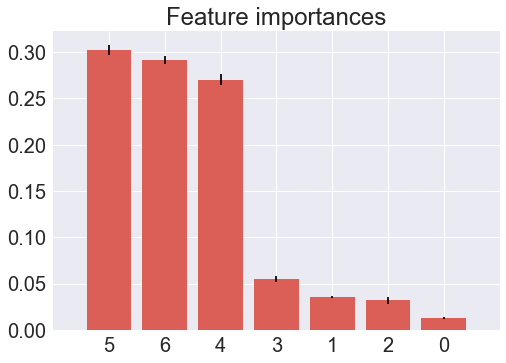

In [194]:
rf_fit()

In [200]:
rf = RandomForestClassifier(max_features=None, random_state=0)
rf_result = rf.fit(under_train_X, under_train_y)

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


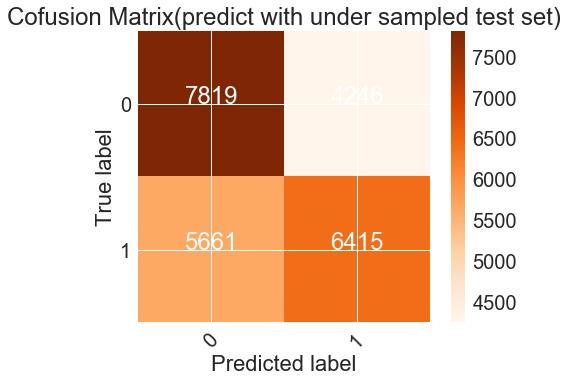

             precision    recall  f1-score   support

          0       0.58      0.65      0.61     12065
          1       0.60      0.53      0.56     12076

avg / total       0.59      0.59      0.59     24141



In [201]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(under_test_y, rf_result.predict(under_test_X))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Cofusion Matrix(predict with under sampled test set)')
plt.show()

print classification_report(under_test_y, rf_result.predict(under_test_X))

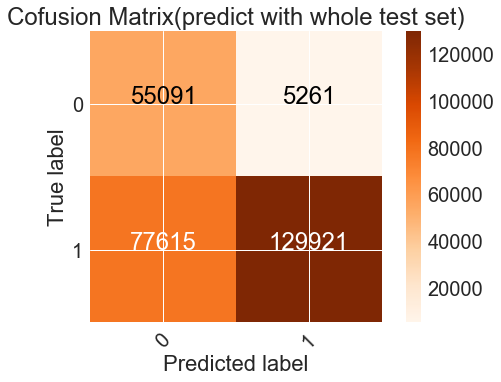

             precision    recall  f1-score   support

          0       0.42      0.91      0.57     60352
          1       0.96      0.63      0.76    207536

avg / total       0.84      0.69      0.72    267888



In [202]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y, rf_result.predict(X))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Cofusion Matrix(predict with whole test set)')
plt.show()

print classification_report(y, rf_result.predict(X))